In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [6]:
# used to find non-matching columns between dataframes .column method
# find_diff_columns(svi_deaths_2014.columns, svi_deaths_2020.columns)
def find_diff_columns(list1, list2):
    list1 = set(list1)
    list2 = set(list2)
    diff_columns = list1 ^ list2
    print(diff_columns)

# County-Level Data Preparation

## 2014 Data

In [7]:
# read in original csv
svi_2014 = pd.read_csv('./data/atsdr-svi/SVI2014_US_CNTY.csv')

# Setting index as FIPS / County Code
svi_2014.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2014.drop(['FID', 'ST', 'STATE', 'ST_ABBR', 'COUNTY', 'LOCATION', 'AFFGEOID', 'AREA_SQMI'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('M')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('EP')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('F')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('RPL')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('SPL')]

svi_2014.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP
FIPS,,,,,,,,,,,,,,,,,,,,
1001,55136.0,22431.0,20304.0,7006.0,2252.0,24644.0,5012.0,7321.0,14214.0,8700.0,1649.0,13103.0,249.0,842.0,4401.0,530.0,1081.0,442.0,5814.0,43534.0
1003,191205.0,105563.0,73058.0,25988.0,7856.0,26851.0,14615.0,33782.0,43186.0,26603.0,5027.0,32158.0,2571.0,18988.0,12200.0,998.0,2242.0,2611.0,27758.0,177010.0
1005,27119.0,11833.0,9145.0,5832.0,1527.0,17350.0,4790.0,4180.0,5862.0,4856.0,1098.0,14614.0,549.0,129.0,3175.0,178.0,802.0,2869.0,3760.0,29769.0
1007,22653.0,8985.0,7078.0,3596.0,975.0,18110.0,3466.0,3209.0,4903.0,3343.0,637.0,5717.0,112.0,163.0,2379.0,17.0,299.0,1576.0,2725.0,19274.0
1009,57645.0,23868.0,20934.0,9866.0,2291.0,20501.0,8567.0,9172.0,13877.0,9729.0,1650.0,6825.0,954.0,215.0,5497.0,344.0,823.0,572.0,6922.0,41857.0


In [8]:
# read in original txt
deaths_2014 = pd.read_csv('./data/mortality/2014-Heart-Related-Deaths.txt', sep='\t')

# drop unnecessary columns
deaths_2014.drop(['Population', 'Notes', 'Crude Rate', 'County'], axis=1, inplace=True)

# drop any rows with incomplete data
deaths_2014.dropna(inplace=True)

# reassign to integer values and set index
deaths_2014 = deaths_2014.astype(int)
deaths_2014.set_index('County Code', inplace=True)

deaths_2014.head()

,Deaths
County Code,
1001,114
1003,465
1005,90
1007,57
1009,143


In [9]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2014 = pd.concat([svi_2014, deaths_2014], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2014.dropna(inplace=True)

# writing joined dataframe to csv
svi_deaths_2014.to_csv('./data/svi-mortality-county/2014-svi-mortality.csv')

svi_deaths_2014.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP,Deaths
1001,55136.0,22431.0,20304.0,7006.0,2252.0,24644.0,5012.0,7321.0,14214.0,8700.0,1649.0,13103.0,249.0,842.0,4401.0,530.0,1081.0,442.0,5814.0,43534.0,114.0
1003,191205.0,105563.0,73058.0,25988.0,7856.0,26851.0,14615.0,33782.0,43186.0,26603.0,5027.0,32158.0,2571.0,18988.0,12200.0,998.0,2242.0,2611.0,27758.0,177010.0,465.0
1005,27119.0,11833.0,9145.0,5832.0,1527.0,17350.0,4790.0,4180.0,5862.0,4856.0,1098.0,14614.0,549.0,129.0,3175.0,178.0,802.0,2869.0,3760.0,29769.0,90.0
1007,22653.0,8985.0,7078.0,3596.0,975.0,18110.0,3466.0,3209.0,4903.0,3343.0,637.0,5717.0,112.0,163.0,2379.0,17.0,299.0,1576.0,2725.0,19274.0,57.0
1009,57645.0,23868.0,20934.0,9866.0,2291.0,20501.0,8567.0,9172.0,13877.0,9729.0,1650.0,6825.0,954.0,215.0,5497.0,344.0,823.0,572.0,6922.0,41857.0,143.0


## 2016 Data

In [10]:
# read in original csv
svi_2016 = pd.read_csv('./data/atsdr-svi/SVI2016_US_COUNTY.csv')

# Setting index as FIPS / County Code
svi_2016.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2016.drop(['FID', 'ST', 'STATE', 'ST_ABBR', 'COUNTY', 'LOCATION', 'AREA_SQMI'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('M')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('EP')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('F')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('RPL')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('SPL')]

svi_2016.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP
FIPS,,,,,,,,,,,,,,,,,,,,
1001,55049.0,22714.0,20800.0,6697.0,1437.0,26168.0,4528.0,7695.0,13853.0,10009.0,1516.0,13386.0,432.0,1034.0,4095.0,254.0,1024.0,490.0,4852.0,40854.0
1009,57704.0,23850.0,20619.0,9441.0,1367.0,21033.0,7882.0,9921.0,13601.0,8538.0,1614.0,7122.0,1018.0,190.0,5467.0,391.0,816.0,552.0,6388.0,42597.0
1017,34018.0,16905.0,13851.0,6805.0,1136.0,21532.0,4708.0,6255.0,7283.0,5960.0,1354.0,14715.0,114.0,597.0,2695.0,555.0,1110.0,482.0,3979.0,27940.0
1031,50991.0,22862.0,19375.0,8219.0,1410.0,25325.0,5145.0,8048.0,12122.0,8942.0,2018.0,14598.0,716.0,218.0,2863.0,270.0,1126.0,616.0,5253.0,47236.0
1033,54377.0,26156.0,22105.0,8910.0,1795.0,23318.0,6344.0,10034.0,11735.0,10561.0,1879.0,11499.0,104.0,641.0,2478.0,150.0,1361.0,432.0,4932.0,56227.0


In [11]:
# read in original txt
deaths_2016 = pd.read_csv('./data/mortality/2016-Heart-Related-Deaths.txt', sep='\t')

# drop unnecessary columns
deaths_2016.drop(['Population', 'Notes', 'Crude Rate', 'County'], axis=1, inplace=True)

# drop any rows with incomplete data
deaths_2016.dropna(inplace=True)

# reassign to integer values and set index
deaths_2016 = deaths_2016.astype(int)
deaths_2016.set_index('County Code', inplace=True)

deaths_2016.head()

,Deaths
County Code,
1001,118
1003,492
1005,67
1007,63
1009,154


In [12]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2016 = pd.concat([svi_2016, deaths_2016], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2016.dropna(inplace=True)

# writing joined dataframe to csv
svi_deaths_2016.to_csv('./data/svi-mortality-county/2016-svi-mortality.csv')

svi_deaths_2016.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP,Deaths
1001,55049.0,22714.0,20800.0,6697.0,1437.0,26168.0,4528.0,7695.0,13853.0,10009.0,1516.0,13386.0,432.0,1034.0,4095.0,254.0,1024.0,490.0,4852.0,40854.0,118.0
1009,57704.0,23850.0,20619.0,9441.0,1367.0,21033.0,7882.0,9921.0,13601.0,8538.0,1614.0,7122.0,1018.0,190.0,5467.0,391.0,816.0,552.0,6388.0,42597.0,154.0
1017,34018.0,16905.0,13851.0,6805.0,1136.0,21532.0,4708.0,6255.0,7283.0,5960.0,1354.0,14715.0,114.0,597.0,2695.0,555.0,1110.0,482.0,3979.0,27940.0,100.0
1031,50991.0,22862.0,19375.0,8219.0,1410.0,25325.0,5145.0,8048.0,12122.0,8942.0,2018.0,14598.0,716.0,218.0,2863.0,270.0,1126.0,616.0,5253.0,47236.0,131.0
1033,54377.0,26156.0,22105.0,8910.0,1795.0,23318.0,6344.0,10034.0,11735.0,10561.0,1879.0,11499.0,104.0,641.0,2478.0,150.0,1361.0,432.0,4932.0,56227.0,161.0


## 2018 Data

In [13]:
# read in original csv
svi_2018 = pd.read_csv('./data/atsdr-svi/SVI2018_US_COUNTY.csv')

# Setting index as FIPS / County Code
svi_2018.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2018.drop(['ST', 'STATE', 'ST_ABBR', 'COUNTY', 'LOCATION', 'AREA_SQMI'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('M')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('EP')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('F')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('RPL')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('SPL')]

svi_2018.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP
FIPS,,,,,,,,,,,,,,,,,,,,
35039,39307,20044,12398,-999,-999,-999,3669,7083,9318,6280,1330,34397,755,67,7770,264,763,654,4160,32290
1001,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,3875,37301
1009,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,6303,40036
1013,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,2005,17280
1015,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,10686,117894


In [14]:
# read in original txt
deaths_2018 = pd.read_csv('./data/mortality/2018-Heart-Related-Deaths.txt', sep='\t')

# drop unnecessary columns
deaths_2018.drop(['Population', 'Notes', 'Crude Rate', 'County'], axis=1, inplace=True)

# drop any rows with incomplete data
deaths_2018.dropna(inplace=True)

# reassign to integer values and set index
deaths_2018 = deaths_2018.astype(int)
deaths_2018.set_index('County Code', inplace=True)

deaths_2018.head()

,Deaths
County Code,
1001,126
1003,574
1005,93
1007,84
1009,179


In [15]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2018 = pd.concat([svi_2018, deaths_2018], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2018.dropna(inplace=True)

# writing joined dataframe to csv
svi_deaths_2018.to_csv('./data/svi-mortality-county/2018-svi-mortality.csv')

svi_deaths_2018.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP,Deaths
35039,39307.0,20044.0,12398.0,-999.0,-999.0,-999.0,3669.0,7083.0,9318.0,6280.0,1330.0,34397.0,755.0,67.0,7770.0,264.0,763.0,654.0,4160.0,32290.0,64.0
1001,55200.0,23315.0,21115.0,8422.0,1065.0,29372.0,4204.0,8050.0,13369.0,10465.0,1586.0,13788.0,426.0,886.0,4279.0,299.0,1191.0,546.0,3875.0,37301.0,126.0
1009,57645.0,24222.0,20600.0,8220.0,909.0,22656.0,7861.0,10233.0,13468.0,8114.0,1437.0,7413.0,934.0,211.0,6108.0,339.0,856.0,543.0,6303.0,40036.0,179.0
1013,20025.0,10026.0,6708.0,4640.0,567.0,20430.0,2141.0,3806.0,4566.0,3492.0,704.0,9641.0,93.0,134.0,2625.0,119.0,520.0,322.0,2005.0,17280.0,78.0
1015,115098.0,53682.0,45033.0,20819.0,4628.0,24706.0,12620.0,19386.0,25196.0,23598.0,4701.0,31675.0,1076.0,1990.0,7904.0,772.0,2599.0,3112.0,10686.0,117894.0,477.0


## 2020 Data

In [16]:
# read in original csv
svi_2020 = pd.read_csv('./data/atsdr-svi/SVI2020_US_COUNTY.csv')

# Setting index as FIPS / County Code
svi_2020.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2020.drop(['ST', 'STATE', 'ST_ABBR', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'STCNTY'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('M')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('EP')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('F')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('RPL')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('SPL')]

svi_2020.head()

,E_TOTPOP,E_HU,E_HH,E_POV150,E_UNEMP,E_HBURD,E_NOHSDP,E_UNINSUR,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_LIMENG,E_MINRTY,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_DAYPOP,E_NOINT,E_AFAM,E_HISP,E_ASIAN,E_AIAN,E_NHPI,E_TWOMORE,E_OTHERRACE
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,55639,23697,21559,12611,736,5029,4273,4345,8490,13143,9658,1608,363,14479,918,4313,339,1167,578,41810,7100,10849,1601,649,155,0,1124,101
1003,218289,116747,84047,36413,4027,19350,14823,20501,44716,46993,30615,3317,1593,37334,19513,11893,1280,2627,2954,218607,24453,19027,9947,2033,1327,10,4250,740
1005,25026,12057,9322,8965,649,2305,4497,2362,4777,5222,4159,1029,433,13694,170,3644,350,1039,2910,27133,6249,11889,1110,122,81,1,334,157
1007,22374,9237,7259,5730,667,1580,3056,1878,3676,4584,3748,790,75,5724,228,2943,91,481,1657,18799,3839,4971,600,56,12,0,85,0
1009,57755,24404,21205,13624,1253,4060,6838,5746,10382,13372,8564,1313,801,7690,167,6043,385,1077,564,42172,8987,771,5362,236,49,55,1038,179


In [17]:
# read in original txt
deaths_2020 = pd.read_csv('./data/mortality/2020-Heart-Related-Deaths.txt', sep='\t')

# drop unnecessary columns
deaths_2020.drop(['Population', 'Notes', 'Crude Rate', 'County'], axis=1, inplace=True)

# drop any rows with incomplete data
deaths_2020.dropna(inplace=True)

# reassign to integer values and set index
deaths_2020 = deaths_2020.astype(int)
deaths_2020.set_index('County Code', inplace=True)

deaths_2020.head()

,Deaths
County Code,
1001,155
1003,584
1005,106
1007,78
1009,198


In [18]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2020 = pd.concat([svi_2020, deaths_2020], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2020.dropna(inplace=True)

# writing joined dataframe to csv
svi_deaths_2020.to_csv('./data/svi-mortality-county/2020-svi-mortality.csv')

svi_deaths_2020.head()

,E_TOTPOP,E_HU,E_HH,E_POV150,E_UNEMP,E_HBURD,E_NOHSDP,E_UNINSUR,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_LIMENG,E_MINRTY,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_DAYPOP,E_NOINT,E_AFAM,E_HISP,E_ASIAN,E_AIAN,E_NHPI,E_TWOMORE,E_OTHERRACE,Deaths
1001,55639.0,23697.0,21559.0,12611.0,736.0,5029.0,4273.0,4345.0,8490.0,13143.0,9658.0,1608.0,363.0,14479.0,918.0,4313.0,339.0,1167.0,578.0,41810.0,7100.0,10849.0,1601.0,649.0,155.0,0.0,1124.0,101.0,155.0
1003,218289.0,116747.0,84047.0,36413.0,4027.0,19350.0,14823.0,20501.0,44716.0,46993.0,30615.0,3317.0,1593.0,37334.0,19513.0,11893.0,1280.0,2627.0,2954.0,218607.0,24453.0,19027.0,9947.0,2033.0,1327.0,10.0,4250.0,740.0,584.0
1005,25026.0,12057.0,9322.0,8965.0,649.0,2305.0,4497.0,2362.0,4777.0,5222.0,4159.0,1029.0,433.0,13694.0,170.0,3644.0,350.0,1039.0,2910.0,27133.0,6249.0,11889.0,1110.0,122.0,81.0,1.0,334.0,157.0,106.0
1007,22374.0,9237.0,7259.0,5730.0,667.0,1580.0,3056.0,1878.0,3676.0,4584.0,3748.0,790.0,75.0,5724.0,228.0,2943.0,91.0,481.0,1657.0,18799.0,3839.0,4971.0,600.0,56.0,12.0,0.0,85.0,0.0,78.0
1009,57755.0,24404.0,21205.0,13624.0,1253.0,4060.0,6838.0,5746.0,10382.0,13372.0,8564.0,1313.0,801.0,7690.0,167.0,6043.0,385.0,1077.0,564.0,42172.0,8987.0,771.0,5362.0,236.0,49.0,55.0,1038.0,179.0,198.0


# Year-to-year County Difference Dataframe

In [19]:
# standardizing column names

# rename columns to match
svi_deaths_2020.rename(columns={'E_POV150': 'E_POV'}, inplace=True)

# drop columns with no equivalent
svi_deaths_2014.drop('E_PCI', axis=1, inplace=True)
svi_deaths_2016.drop('E_PCI', axis=1, inplace=True)
svi_deaths_2018.drop('E_PCI', axis=1, inplace=True)
svi_deaths_2020.drop(['E_HBURD', 'E_NOINT', 'E_AFAM', 'E_HISP', 'E_ASIAN', 'E_AIAN', 'E_NHPI', 'E_TWOMORE', 'E_OTHERRACE'], axis=1, inplace=True)

In [20]:
# calculating deaths per 100,000 population
svi_deaths_2014['Deaths per 100,000 Population'] = svi_deaths_2014['Deaths'] / (svi_deaths_2014['E_TOTPOP'] / 100000)
svi_deaths_2016['Deaths per 100,000 Population'] = svi_deaths_2016['Deaths'] / (svi_deaths_2016['E_TOTPOP'] / 100000)
svi_deaths_2018['Deaths per 100,000 Population'] = svi_deaths_2018['Deaths'] / (svi_deaths_2018['E_TOTPOP'] / 100000)
svi_deaths_2020['Deaths per 100,000 Population'] = svi_deaths_2020['Deaths'] / (svi_deaths_2020['E_TOTPOP'] / 100000)

# create dataframes of year-to-year difference values
diff_2014_2016 = svi_deaths_2016 - svi_deaths_2014
diff_2016_2018 = svi_deaths_2018 - svi_deaths_2016
diff_2018_2020 = svi_deaths_2020 - svi_deaths_2018

# add prefix to all columns
diff_2016_2018 = diff_2016_2018.add_prefix('C-')
diff_2018_2020 = diff_2018_2020.add_prefix('C-')
diff_2014_2016 = diff_2014_2016.add_prefix('C-')

# combine year data with change from previous year
comb_2016 = pd.concat([svi_deaths_2016, diff_2014_2016], axis=1)
comb_2018 = pd.concat([svi_deaths_2018, diff_2016_2018], axis=1)
comb_2020 = pd.concat([svi_deaths_2020, diff_2018_2020], axis=1)

# change prefix of values in index column
comb_2016.set_index(comb_2016.index.astype(str) + '_2016', inplace=True)
comb_2018.set_index(comb_2018.index.astype(str) + '_2018', inplace=True)
comb_2020.set_index(comb_2020.index.astype(str) + '_2020', inplace=True)

# combine dataframes to create final df to be used for ML
machine_learning_df = pd.concat([comb_2016, comb_2018, comb_2020])

# label risk categories - old using change in deaths metric
# risk_conditions = [
#     (machine_learning_df['C-Deaths per 100,000 Population'] < -49.7),   # low risk - 0
#     (machine_learning_df['C-Deaths per 100,000 Population'] >= -49.7) & (machine_learning_df['C-Deaths per 100,000 Population'] <= 65.9),   # standard risk - 1
#     (machine_learning_df['C-Deaths per 100,000 Population'] > 65.9)     # high risk - 2
# ]

# label risk categories - new using ratio of deaths metric
risk_conditions = [
    (machine_learning_df['Deaths per 100,000 Population'] < 275),   # low risk - 0
    # (machine_learning_df['Deaths per 100,000 Population'] >= 176.61) & (machine_learning_df['Deaths per 100,000 Population'] <= 355.35),   # standard risk - 1
    (machine_learning_df['Deaths per 100,000 Population'] >= 275)     # high risk - 2
]

risk_values = [0, 1]

machine_learning_df['Risk Category'] = np.select(risk_conditions, risk_values)

# clean, sort, and save csv
machine_learning_df.dropna(inplace=True)
machine_learning_df.sort_index(inplace=True)

machine_learning_df.to_csv('./data/machine-learning.csv')

<AxesSubplot:>

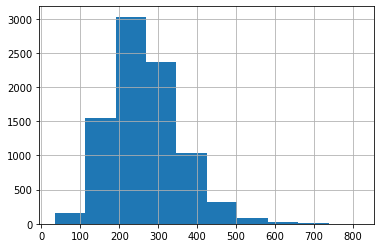

In [23]:
machine_learning_df['Deaths per 100,000 Population'].hist()

# State-Level Data Preparation

## 2014

In [18]:
# read in original csv
svi_2014 = pd.read_csv('./data/atsdr-svi/SVI2014_US_CNTY.csv')

# Setting index as FIPS / County Code
svi_2014.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2014.drop(['ST', 'STATE', 'COUNTY', 'LOCATION', 'AFFGEOID', 'AREA_SQMI', 'FID'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('M')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('EP')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('F_')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('RPL')]
svi_2014 = svi_2014.loc[:, ~svi_2014.columns.str.startswith('SPL')]

svi_2014.head()

,ST_ABBR,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,55136.0,22431.0,20304.0,7006.0,2252.0,24644.0,5012.0,7321.0,14214.0,8700.0,1649.0,13103.0,249.0,842.0,4401.0,530.0,1081.0,442.0,5814.0,43534.0
1003,AL,191205.0,105563.0,73058.0,25988.0,7856.0,26851.0,14615.0,33782.0,43186.0,26603.0,5027.0,32158.0,2571.0,18988.0,12200.0,998.0,2242.0,2611.0,27758.0,177010.0
1005,AL,27119.0,11833.0,9145.0,5832.0,1527.0,17350.0,4790.0,4180.0,5862.0,4856.0,1098.0,14614.0,549.0,129.0,3175.0,178.0,802.0,2869.0,3760.0,29769.0
1007,AL,22653.0,8985.0,7078.0,3596.0,975.0,18110.0,3466.0,3209.0,4903.0,3343.0,637.0,5717.0,112.0,163.0,2379.0,17.0,299.0,1576.0,2725.0,19274.0
1009,AL,57645.0,23868.0,20934.0,9866.0,2291.0,20501.0,8567.0,9172.0,13877.0,9729.0,1650.0,6825.0,954.0,215.0,5497.0,344.0,823.0,572.0,6922.0,41857.0


In [19]:
# created during county-level data prep
deaths_2014.head()

,Deaths
County Code,
1001,114
1003,465
1005,90
1007,57
1009,143


In [20]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2014 = pd.concat([svi_2014, deaths_2014], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2014.dropna(inplace=True)

# Grouping counties into states and combining SVI population estimates plus heart-related deaths.
svi_deaths_2014 = svi_deaths_2014.groupby(['ST_ABBR']).sum()

# calculating deaths per 100,000 population
svi_deaths_2014['Deaths per 100,000 Population'] = svi_deaths_2014['Deaths'] / (svi_deaths_2014['E_TOTPOP'] / 100000)

# writing joined dataframe to csv
svi_deaths_2014.to_csv('./data/svi-mortality-state/2014-svi-mortality.csv')

svi_deaths_2014.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP,Deaths,"Deaths per 100,000 Population"
ST_ABBR,,,,,,,,,,,,,,,,,,,,,,
AK,665479.0,280993.0,234549.0,60594.0,27979.0,421946.0,32171.0,57911.0,170469.0,70028.0,23860.0,225046.0,10055.0,22797.0,14087.0,12480.0,17443.0,18822.0,115677.0,667744.0,729.0,109.545155
AL,4817678.0,2190638.0,1842174.0,889710.0,228716.0,1385449.0,524368.0,699261.0,1117918.0,764700.0,184791.0,1611090.0,59335.0,149879.0,298914.0,33597.0,119315.0,116606.0,640276.0,4935865.0,12461.0,258.651574
AR,2947036.0,1329139.0,1132488.0,549303.0,115090.0,1491162.0,306199.0,442175.0,709557.0,482953.0,112918.0,768845.0,44503.0,82953.0,170483.0,28248.0,72003.0,81350.0,455936.0,2918651.0,7581.0,257.241513
AZ,6561516.0,2874548.0,2387246.0,1169309.0,304067.0,315392.0,604392.0,974487.0,1620492.0,767091.0,239993.0,2826663.0,320856.0,332467.0,303983.0,106496.0,164029.0,147867.0,1050638.0,6194018.0,10805.0,164.672310
CA,38048506.0,13763868.0,12610452.0,6113874.0,2083427.0,1519069.0,4601156.0,4615383.0,9208677.0,3849407.0,1241146.0,23155890.0,3779374.0,2310811.0,517537.0,1038931.0,984673.0,815162.0,6263748.0,37697027.0,58177.0,152.902193


## 2016

In [21]:
# read in original csv
svi_2016 = pd.read_csv('./data/atsdr-svi/SVI2016_US_COUNTY.csv')

# Setting index as FIPS / County Code
svi_2016.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2016.drop(['FID', 'ST', 'STATE', 'COUNTY', 'LOCATION', 'AREA_SQMI'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('M')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('EP')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('F_')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('RPL')]
svi_2016 = svi_2016.loc[:, ~svi_2016.columns.str.startswith('SPL')]

svi_2016.head()

,ST_ABBR,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,55049.0,22714.0,20800.0,6697.0,1437.0,26168.0,4528.0,7695.0,13853.0,10009.0,1516.0,13386.0,432.0,1034.0,4095.0,254.0,1024.0,490.0,4852.0,40854.0
1009,AL,57704.0,23850.0,20619.0,9441.0,1367.0,21033.0,7882.0,9921.0,13601.0,8538.0,1614.0,7122.0,1018.0,190.0,5467.0,391.0,816.0,552.0,6388.0,42597.0
1017,AL,34018.0,16905.0,13851.0,6805.0,1136.0,21532.0,4708.0,6255.0,7283.0,5960.0,1354.0,14715.0,114.0,597.0,2695.0,555.0,1110.0,482.0,3979.0,27940.0
1031,AL,50991.0,22862.0,19375.0,8219.0,1410.0,25325.0,5145.0,8048.0,12122.0,8942.0,2018.0,14598.0,716.0,218.0,2863.0,270.0,1126.0,616.0,5253.0,47236.0
1033,AL,54377.0,26156.0,22105.0,8910.0,1795.0,23318.0,6344.0,10034.0,11735.0,10561.0,1879.0,11499.0,104.0,641.0,2478.0,150.0,1361.0,432.0,4932.0,56227.0


In [22]:
deaths_2016.head()

,Deaths
County Code,
1001,118
1003,492
1005,67
1007,63
1009,154


In [23]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2016 = pd.concat([svi_2016, deaths_2016], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2016.dropna(inplace=True)

# Grouping counties into states and combining SVI population estimates plus heart-related deaths.
svi_deaths_2016 = svi_deaths_2016.groupby(['ST_ABBR']).sum()

# calculating deaths per 100,000 population
svi_deaths_2016['Deaths per 100,000 Population'] = svi_deaths_2016['Deaths'] / (svi_deaths_2016['E_TOTPOP'] / 100000)

# writing joined dataframe to csv
svi_deaths_2016.to_csv('./data/svi-mortality-state/2016-svi-mortality.csv')

svi_deaths_2016.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP,Deaths,"Deaths per 100,000 Population"
ST_ABBR,,,,,,,,,,,,,,,,,,,,,,
AK,667469.0,273025.0,228441.0,63144.0,27188.0,401979.0,31110.0,62459.0,170228.0,72224.0,22606.0,243713.0,9531.0,21044.0,12268.0,13916.0,19263.0,22177.0,103654.0,671187.0,765.0,114.612064
AL,4841164.0,2209335.0,1851061.0,868666.0,184479.0,1422594.0,496036.0,742394.0,1105189.0,777592.0,178209.0,1636829.0,51759.0,155936.0,295722.0,31333.0,119374.0,118341.0,552918.0,4871021.0,12832.0,265.060221
AR,2968472.0,1341391.0,1141480.0,542431.0,93190.0,1544375.0,292228.0,464987.0,707234.0,492769.0,108751.0,790572.0,44028.0,84757.0,167777.0,29803.0,72981.0,83163.0,359572.0,2990687.0,8090.0,272.530784
AZ,6728577.0,2913541.0,2448919.0,1165636.0,249972.0,326795.0,611243.0,1070151.0,1619618.0,833586.0,237676.0,2950701.0,320154.0,336369.0,309197.0,109307.0,164945.0,152762.0,902079.0,6660107.0,11957.0,177.704736
CA,38638971.0,13895966.0,12802094.0,6002814.0,1683006.0,1625654.0,4571407.0,4974880.0,9137226.0,4026941.0,1210057.0,23811787.0,3717321.0,2355758.0,516258.0,1050194.0,974283.0,815630.0,4801235.0,38806064.0,61561.0,159.323601


## 2018

In [24]:
# read in original csv
svi_2018 = pd.read_csv('./data/atsdr-svi/SVI2018_US_COUNTY.csv')

# Setting index as FIPS / County Code
svi_2018.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2018.drop(['ST', 'STATE', 'COUNTY', 'LOCATION', 'AREA_SQMI'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('M')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('EP')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('F')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('RPL')]
svi_2018 = svi_2018.loc[:, ~svi_2018.columns.str.startswith('SPL')]

svi_2018.head()

,ST_ABBR,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP
FIPS,,,,,,,,,,,,,,,,,,,,,
35039,NM,39307,20044,12398,-999,-999,-999,3669,7083,9318,6280,1330,34397,755,67,7770,264,763,654,4160,32290
1001,AL,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,3875,37301
1009,AL,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,6303,40036
1013,AL,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322,2005,17280
1015,AL,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112,10686,117894


In [25]:
deaths_2018.head()

,Deaths
County Code,
1001,126
1003,574
1005,93
1007,84
1009,179


In [26]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2018 = pd.concat([svi_2018, deaths_2018], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2018.dropna(inplace=True)

# Grouping counties into states and combining SVI population estimates plus heart-related deaths.
svi_deaths_2018 = svi_deaths_2018.groupby(['ST_ABBR']).sum()

# calculating deaths per 100,000 population
svi_deaths_2018['Deaths per 100,000 Population'] = svi_deaths_2018['Deaths'] / (svi_deaths_2018['E_TOTPOP'] / 100000)

# writing joined dataframe to csv
svi_deaths_2018.to_csv('./data/svi-mortality-state/2018-svi-mortality.csv')

svi_deaths_2018.head()

,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_UNINSUR,E_DAYPOP,Deaths,"Deaths per 100,000 Population"
ST_ABBR,,,,,,,,,,,,,,,,,,,,,,
AK,684320.0,289352.0,238344.0,68841.0,25157.0,453526.0,30621.0,72701.0,172482.0,79424.0,22310.0,251106.0,10513.0,22628.0,13731.0,14344.0,18849.0,19268.0,90956.0,635879.0,756.0,110.474632
AL,4864680.0,2244462.0,1860269.0,829400.0,147898.0,1545880.0,470043.0,783832.0,1098793.0,780618.0,171668.0,1667950.0,48517.0,161672.0,298206.0,32038.0,115360.0,118799.0,477474.0,4582635.0,13473.0,276.955524
AR,2990671.0,1362040.0,1152175.0,510337.0,75774.0,1683205.0,276029.0,487536.0,705943.0,505899.0,112168.0,816822.0,44593.0,87160.0,167156.0,30795.0,73619.0,84212.0,265434.0,2843651.0,8171.0,273.216278
AZ,6946685.0,2970935.0,2524300.0,1092192.0,210214.0,351891.0,613002.0,1158320.0,1633783.0,885094.0,233649.0,3120799.0,316488.0,345302.0,311084.0,113062.0,160011.0,156005.0,748306.0,5994239.0,12455.0,179.294153
CA,39147614.0,14083091.0,12965136.0,5486914.0,1321423.0,1832157.0,4475478.0,5315164.0,9073416.0,4089448.0,1157336.0,24452456.0,3597437.0,2418022.0,520229.0,1065023.0,939016.0,819443.0,3280049.0,33504181.0,62542.0,159.759417


## 2020

In [27]:
# read in original csv
svi_2020 = pd.read_csv('./data/atsdr-svi/SVI2020_US_COUNTY.csv')

# Setting index as FIPS / County Code
svi_2020.set_index('FIPS', inplace=True)

# Dropping unneeded columns
svi_2020.drop(['ST', 'STATE', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'STCNTY'], axis=1, inplace=True)

# Dropping computed columns, indicated by starting string
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('M')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('EP')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('F')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('RPL')]
svi_2020 = svi_2020.loc[:, ~svi_2020.columns.str.startswith('SPL')]

svi_2020.head()

,ST_ABBR,E_TOTPOP,E_HU,E_HH,E_POV150,E_UNEMP,E_HBURD,E_NOHSDP,E_UNINSUR,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_LIMENG,E_MINRTY,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_DAYPOP,E_NOINT,E_AFAM,E_HISP,E_ASIAN,E_AIAN,E_NHPI,E_TWOMORE,E_OTHERRACE
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,AL,55639,23697,21559,12611,736,5029,4273,4345,8490,13143,9658,1608,363,14479,918,4313,339,1167,578,41810,7100,10849,1601,649,155,0,1124,101
1003,AL,218289,116747,84047,36413,4027,19350,14823,20501,44716,46993,30615,3317,1593,37334,19513,11893,1280,2627,2954,218607,24453,19027,9947,2033,1327,10,4250,740
1005,AL,25026,12057,9322,8965,649,2305,4497,2362,4777,5222,4159,1029,433,13694,170,3644,350,1039,2910,27133,6249,11889,1110,122,81,1,334,157
1007,AL,22374,9237,7259,5730,667,1580,3056,1878,3676,4584,3748,790,75,5724,228,2943,91,481,1657,18799,3839,4971,600,56,12,0,85,0
1009,AL,57755,24404,21205,13624,1253,4060,6838,5746,10382,13372,8564,1313,801,7690,167,6043,385,1077,564,42172,8987,771,5362,236,49,55,1038,179


In [28]:
deaths_2020.head()

,Deaths
County Code,
1001,155
1003,584
1005,106
1007,78
1009,198


In [29]:
# Joining heart deaths and SVI scores for every county
svi_deaths_2020 = pd.concat([svi_2020, deaths_2020], axis=1, ignore_index=False)

# Dropping rows with incomplete data
svi_deaths_2020.dropna(inplace=True)

# Grouping counties into states and combining SVI population estimates plus heart-related deaths.
svi_deaths_2020 = svi_deaths_2020.groupby(['ST_ABBR']).sum()

# calculating deaths per 100,000 population
svi_deaths_2020['Deaths per 100,000 Population'] = svi_deaths_2020['Deaths'] / (svi_deaths_2020['E_TOTPOP'] / 100000)

# writing joined dataframe to csv
svi_deaths_2020.to_csv('./data/svi-mortality-state/2020-svi-mortality.csv')

svi_deaths_2020.head()

,E_TOTPOP,E_HU,E_HH,E_POV150,E_UNEMP,E_HBURD,E_NOHSDP,E_UNINSUR,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_LIMENG,E_MINRTY,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,E_DAYPOP,E_NOINT,E_AFAM,E_HISP,E_ASIAN,E_AIAN,E_NHPI,E_TWOMORE,E_OTHERRACE,Deaths,"Deaths per 100,000 Population"
ST_ABBR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,668296.0,280935.0,232671.0,108543.0,23488.0,57837.0,28907.0,77229.0,78016.0,166811.0,77926.0,14022.0,9434.0,257006.0,22848.0,11523.0,14334.0,18444.0,21403.0,659540.0,57706.0,21862.0,49332.0,40713.0,79615.0,9942.0,52723.0,2819.0,834.0,124.795001
AL,4893186.0,2270398.0,1888504.0,1234349.0,125343.0,450272.0,438947.0,455545.0,827434.0,1092912.0,778062.0,135232.0,46887.0,1701039.0,166932.0,296231.0,31447.0,111849.0,117179.0,4848456.0,767113.0,1292950.0,212951.0,67317.0,21297.0,1887.0,94858.0,9779.0,14739.0,301.214791
AR,3011873.0,1379778.0,1170544.0,798280.0,71704.0,270183.0,260360.0,245980.0,510117.0,702832.0,520988.0,86714.0,45657.0,856774.0,89283.0,160888.0,32498.0,71868.0,83757.0,2983518.0,556657.0,455485.0,229629.0,45389.0,15912.0,10258.0,93127.0,6974.0,8621.0,286.233849
AZ,7174064.0,3040595.0,2643430.0,1625454.0,199358.0,726913.0,587919.0,747778.0,1262204.0,1639645.0,935769.0,168805.0,294903.0,3290342.0,355570.0,313906.0,116503.0,153994.0,157934.0,7074572.0,797193.0,305973.0,2260690.0,233048.0,272294.0,13323.0,187561.0,17453.0,14196.0,197.879472
CA,39341966.0,14206814.0,13101467.0,8063300.0,1228936.0,4160234.0,4286325.0,2805874.0,5643343.0,8955945.0,4146295.0,786474.0,3392765.0,24979977.0,2509344.0,515435.0,1075709.0,920293.0,824667.0,39531691.0,3351496.0,2142358.0,15380453.0,5743977.0,131366.0,135524.0,1322151.0,124148.0,66522.0,169.086619
